In [36]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
n_pix_pupil = 128
n_pix_psf = 256
NA = 0.9
wavelength = 632
fov = 3000
defocus = 1500

# Todo: fix Zernike polynomials type error
pupil1 = ScalarCartesianPupil(n_pix_pupil, zernike_coefficients=[0,0,0,1,-1])
pupil2 = ScalarPolarPupil(n_pix_pupil, zernike_coefficients=[0,0,0,1,-1])
pupil3 = VectorialCartesianPupil(n_pix_pupil)
pupil4 = VectorialPolarPupil(n_pix_pupil)

torch.Size([10, 1, 256, 256])


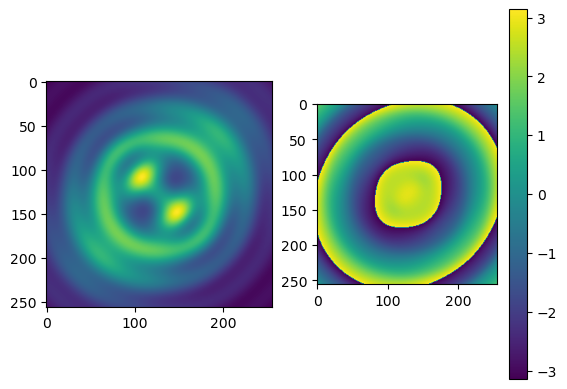

In [34]:
propagator1 = ScalarCartesianPropagator(pupil1, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                        defocus_min=0, defocus_max=defocus, n_defocus=10)
field1 = propagator1.compute_focus_field()

idx = 6
print(field1.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field1[idx,...].squeeze())**2)
plt.subplot(122)
plt.imshow(torch.angle(field1[idx,...].squeeze()))
plt.colorbar()
plt.show()

torch.Size([10, 1, 256, 256])


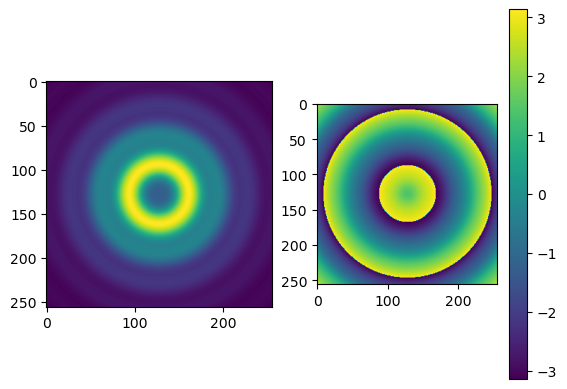

In [39]:
propagator2 = ScalarPolarPropagator(pupil2, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                    defocus_min=0, defocus_max=defocus, n_defocus=10)
field2 = propagator2.compute_focus_field()

idx = 6
print(field2.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field2[idx,...].squeeze())**2)
plt.subplot(122)
plt.imshow(torch.angle(field2[idx,...].squeeze()))
plt.colorbar()
plt.show()

In [19]:
a = torch.abs(field1.squeeze())**2
b = torch.abs(field2.squeeze())**2
metric = torch.sum((a-b)**2) / torch.sum(a**2)
print(metric)


tensor(0.3482)


In [21]:
a/b

tensor([[0.7519, 0.6809, 0.6252,  ..., 0.6872, 0.7552, 0.8421],
        [0.6809, 0.6247, 0.5794,  ..., 0.6321, 0.6871, 0.7557],
        [0.6252, 0.5794, 0.5418,  ..., 0.5869, 0.6325, 0.6881],
        ...,
        [0.6872, 0.6321, 0.5869,  ..., 0.6315, 0.6851, 0.7506],
        [0.7552, 0.6871, 0.6325,  ..., 0.6851, 0.7500, 0.8312],
        [0.8421, 0.7557, 0.6881,  ..., 0.7506, 0.8312, 0.9346]])